<a href="https://colab.research.google.com/github/Pranayr/StockAnalysis_zoomcamp/blob/main/Week1_StockMarket_zoomcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

In [33]:
end = date.today()
start = date(year=end.year-70, month=end.month, day=end.day)
start, end

(datetime.date(1954, 4, 24), datetime.date(2024, 4, 24))

In [34]:
#Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)
gdppot

,GDPPOT
DATE,
1954-07-01,2922.682483
1954-10-01,2941.203176
1955-01-01,2959.166643
1955-04-01,2978.435270
1955-07-01,2997.302681
...,...
2023-04-01,22246.230000
2023-07-01,22369.710000
2023-10-01,22495.190000


In [35]:
gdppot['gdppot_us_yoy'] = gdppot['GDPPOT']/gdppot['GDPPOT'].shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot['GDPPOT']/gdppot['GDPPOT'].shift(1)-1
gdppot.tail()

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2023-04-01,22246.23,0.021312,0.005442
2023-07-01,22369.71,0.021719,0.005551
2023-10-01,22495.19,0.022190,0.005609
2024-01-01,22618.15,0.022251,0.005466
2024-04-01,22739.00,0.022151,0.005343


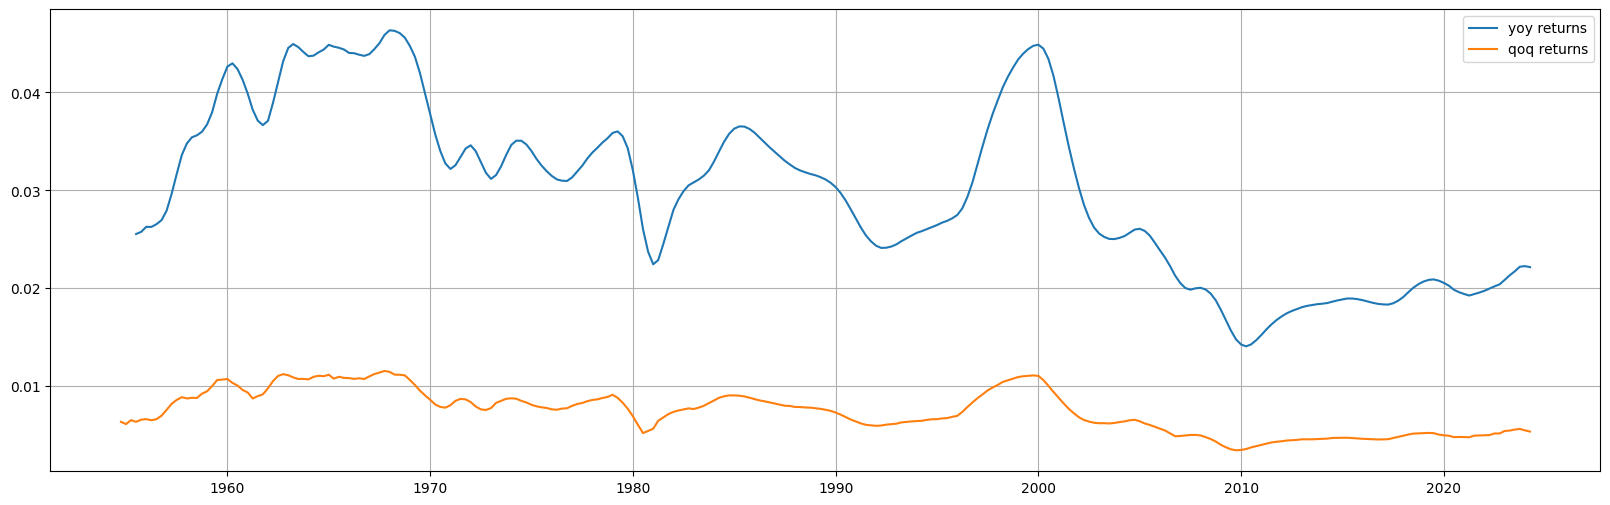

In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(gdppot['gdppot_us_yoy'],label='yoy returns')
plt.plot(gdppot['gdppot_us_qoq'],label='qoq returns')
plt.grid(True)
plt.legend()

## How-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

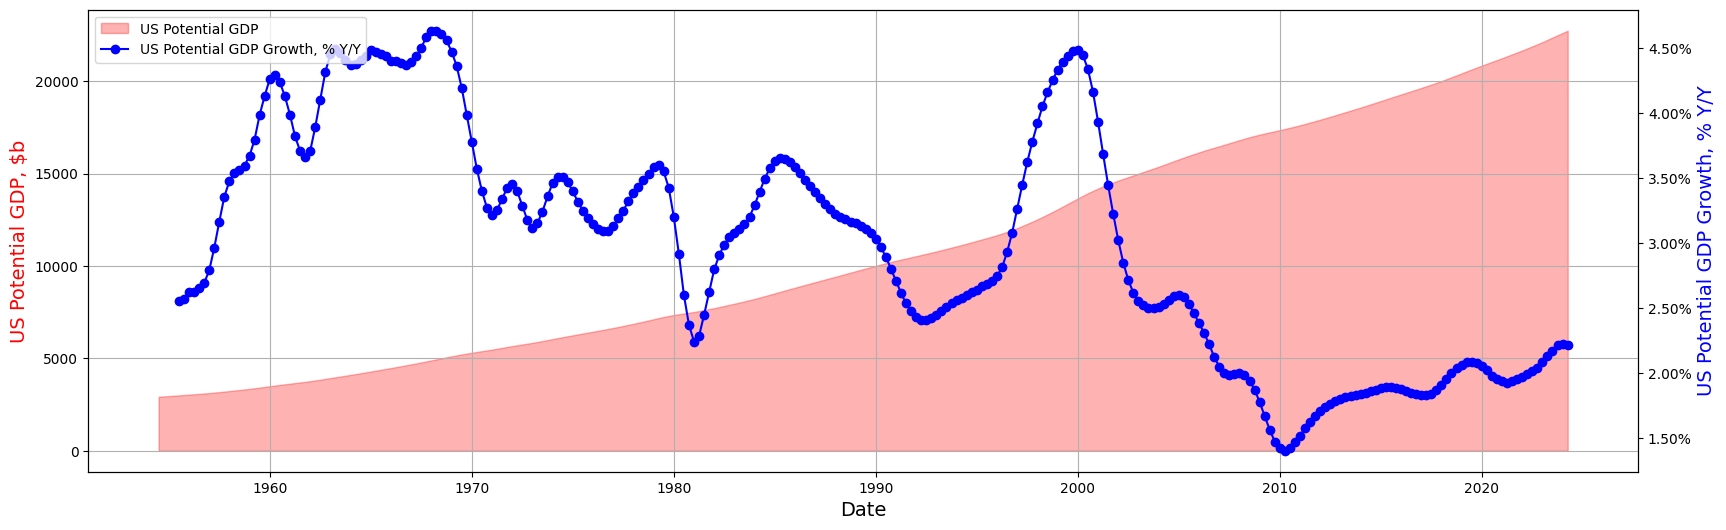

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [38]:
cpilfesl = pdr.DataReader("CPILFESL", "fred", start = start)
cpilfesl.head()

,CPILFESL
DATE,
1957-01-01,28.5
1957-02-01,28.6
1957-03-01,28.7
1957-04-01,28.8
1957-05-01,28.8


In [39]:
cpilfesl["cpi_core_yoy"] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12) - 1
cpilfesl["cpi_core_mom"] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1) - 1
cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2023-03-01,305.112,0.055601,0.003249
2023-04-01,306.539,0.055157,0.004677
2023-05-01,307.646,0.053322,0.003611
2023-06-01,308.245,0.048552,0.001947
2023-07-01,308.945,0.047076,0.002271
2023-08-01,309.656,0.044128,0.002301
2023-09-01,310.644,0.041437,0.003191
2023-10-01,311.390,0.040217,0.002401
2023-11-01,312.349,0.040151,0.003080


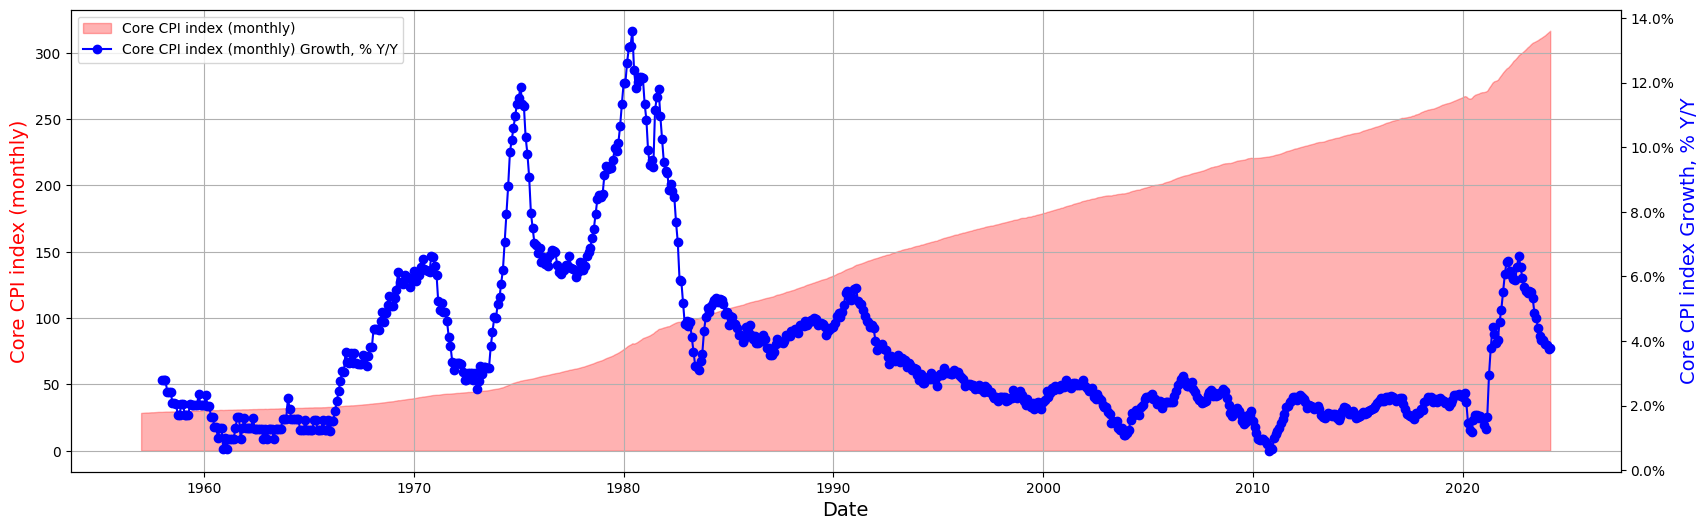

In [40]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [41]:
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.head()

,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83


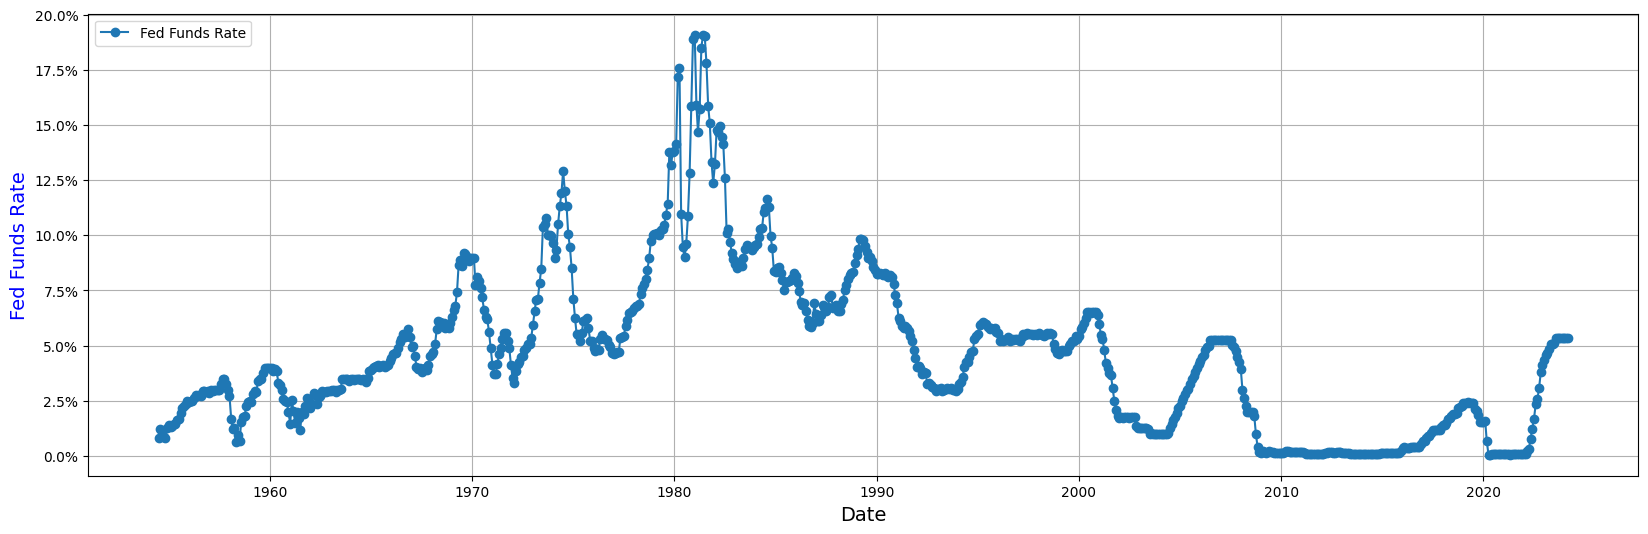

In [42]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()


In [43]:
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()


,DGS5
DATE,
2024-04-16,4.69
2024-04-17,4.62
2024-04-18,4.68
2024-04-19,4.66
2024-04-22,4.66


## S&P 500

In [44]:
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-23,5028.85,5076.12,5027.96,5070.55,2.330851e+09
2024-04-22,4987.33,5038.84,4969.40,5010.60,2.352809e+09
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.735280e+09
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09
2024-04-17,5068.97,5077.96,5007.25,5022.21,2.295628e+09


In [45]:
spx_index["spx_dod"] = (spx_index.Close / spx_index.Close.shift(-1)) - 1
spx_index.head(5)

,Open,High,Low,Close,Volume,spx_dod
Date,,,,,,
2024-04-23,5028.85,5076.12,5027.96,5070.55,2.330851e+09,0.011965
2024-04-22,4987.33,5038.84,4969.40,5010.60,2.352809e+09,0.008731
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.735280e+09,-0.008759
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09,-0.002208
2024-04-17,5068.97,5077.96,5007.25,5022.21,2.295628e+09,-0.005781


In [46]:
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)
spx_index

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2024-04-23,5028.85,5076.12,5027.96,5070.55,2.330851e+09,0.011965,0.042336,0.226691
2024-04-22,4987.33,5038.84,4969.40,5010.60,2.352809e+09,0.008731,0.033022,0.213282
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.735280e+09,-0.008759,0.026327,0.195621
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09,-0.002208,0.048145,0.206083
2024-04-17,5068.97,5077.96,5007.25,5022.21,2.295628e+09,-0.005781,0.059715,0.209786
...,...,...,...,...,...,...,...,...
1954-04-30,28.26,28.26,28.26,28.26,1.361111e+06,0.002839,NaN,NaN
1954-04-29,28.18,28.18,28.18,28.18,1.194444e+06,0.015130,NaN,NaN
1954-04-28,27.76,27.76,27.76,27.76,1.177778e+06,0.001804,NaN,NaN


In [47]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']
spx_truncated

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2024-04-23,5028.85,5076.12,5027.96,5070.55,2.330851e+09,0.011965,0.042336,0.226691
2024-04-22,4987.33,5038.84,4969.40,5010.60,2.352809e+09,0.008731,0.033022,0.213282
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.735280e+09,-0.008759,0.026327,0.195621
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09,-0.002208,0.048145,0.206083
2024-04-17,5068.97,5077.96,5007.25,5022.21,2.295628e+09,-0.005781,0.059715,0.209786
...,...,...,...,...,...,...,...,...
1990-01-08,352.20,354.24,350.54,353.79,7.783889e+07,0.004514,-0.013908,0.259129
1990-01-05,355.67,355.67,351.35,352.20,8.807222e+07,-0.009756,-0.013362,0.254854
1990-01-04,358.76,358.76,352.89,355.67,9.833333e+07,-0.008613,-0.003558,0.270205


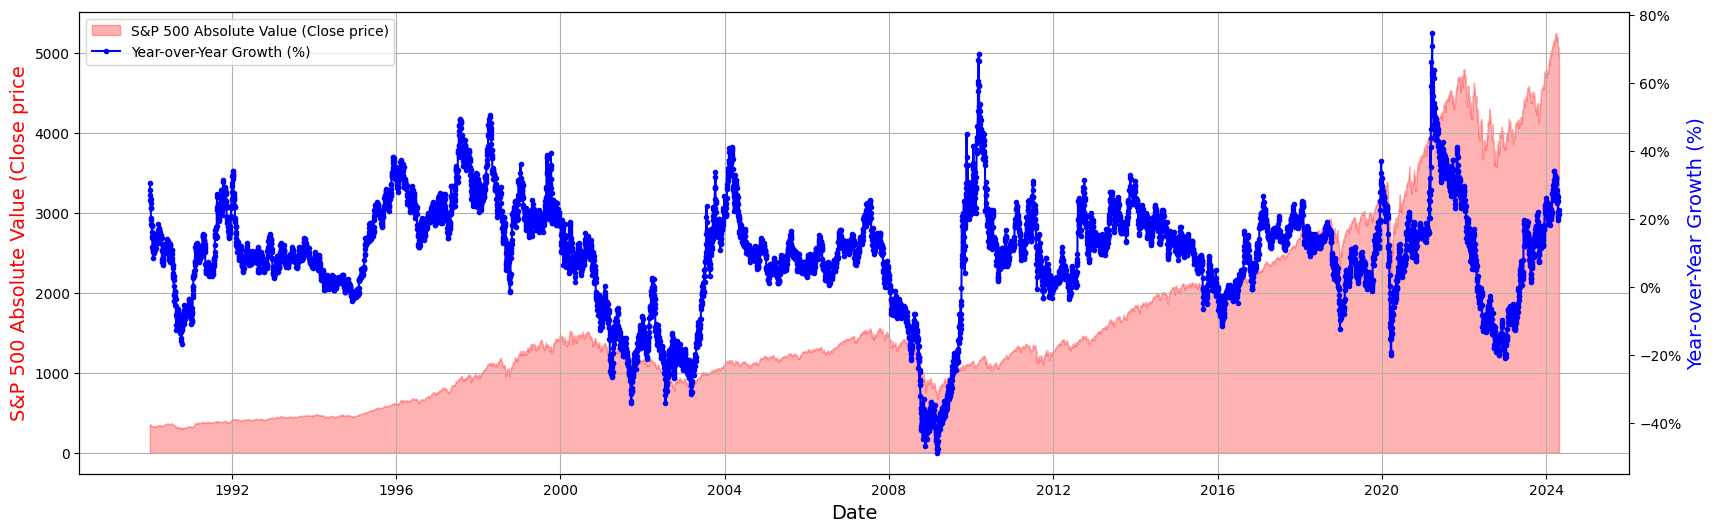

In [48]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3,label="S&P 500 Absolute Value (Close price)")

ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy, color="blue", marker=".", label="Year-over-Year Growth (%)")

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [49]:
dax_daily = yf.download("^GDAXI", period="max", interval="1D")
dax_daily

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0
...,...,...,...,...,...,...
2024-04-18,17775.410156,17863.320312,17716.919922,17837.400391,17837.400391,60700500
2024-04-19,17834.830078,17834.869141,17626.900391,17737.359375,17737.359375,79447700
2024-04-22,17738.039062,17889.470703,17738.039062,17860.800781,17860.800781,62454400


In [50]:
dax_daily['yoy_growth']  = dax_daily["Adj Close"]/dax_daily["Adj Close"].shift(252) - 1
dax_daily

,Open,High,Low,Close,Adj Close,Volume,yoy_growth
Date,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,NaN
...,...,...,...,...,...,...,...
2024-04-18,17775.410156,17863.320312,17716.919922,17837.400391,17837.400391,60700500,0.124398
2024-04-19,17834.830078,17834.869141,17626.900391,17737.359375,17737.359375,79447700,0.117516
2024-04-22,17738.039062,17889.470703,17738.039062,17860.800781,17860.800781,62454400,0.130736


<Axes: xlabel='Date'>

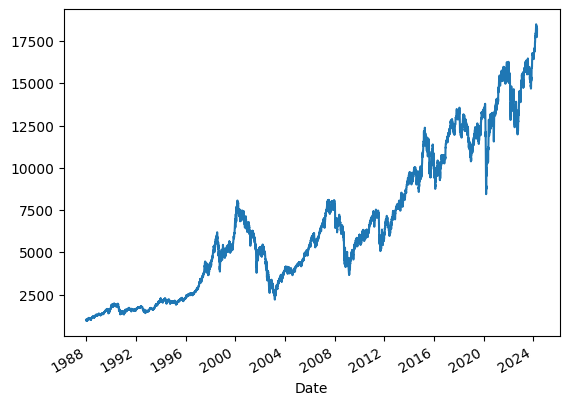

In [51]:
dax_daily["Adj Close"].plot(kind="line")

In [52]:
snp500_daily = yf.download("^SPX", period="max", interval="1D")
snp500_daily

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000


In [53]:
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")
snp500_daily_non_delayed

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000


In [54]:

dji_daily = yf.download(tickers = "^DJI",
                     period = "max",
                                          interval = "1d")

dji_daily

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,3172.399902,23550000
1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,3201.500000,23620000
1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,3200.100098,27280000
1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,3204.800049,25510000
1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,3203.899902,29040000
...,...,...,...,...,...,...
2024-04-17,37949.671875,38036.699219,37611.558594,37753.308594,37753.308594,314650000
2024-04-18,37847.210938,38083.761719,37681.519531,37775.378906,37775.378906,300230000
2024-04-19,37801.980469,38102.570312,37781.609375,37986.398438,37986.398438,420460000


In [55]:
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")
epi_etf_daily.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-17,43.980000,43.980000,43.750000,43.770000,43.770000,613600
2024-04-18,43.770000,43.950001,43.610001,43.810001,43.810001,669900
2024-04-19,43.830002,44.060001,43.830002,44.009998,44.009998,699800
2024-04-22,44.279999,44.509998,44.250000,44.459999,44.459999,601500
2024-04-23,44.400002,44.650002,44.360001,44.619999,44.619999,1057800


In [56]:
epi_etf_daily[(epi_etf_daily.index>="2023-06-23")&(epi_etf_daily.index<="2023-06-28")]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,34.029999,34.150002,33.930000,34.020000,33.960003,344100
2023-06-26,34.110001,34.160000,34.049999,34.080002,34.080002,634600
2023-06-27,34.279999,34.310001,34.230000,34.310001,34.310001,417100
2023-06-28,34.410000,34.529999,34.389999,34.529999,34.529999,454400


<Axes: xlabel='Date'>

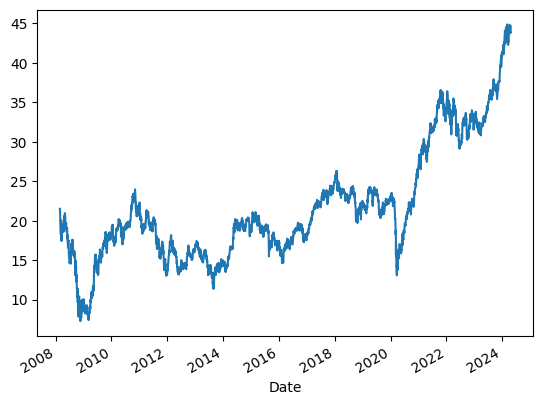

In [57]:
epi_etf_daily["Adj Close"].plot(kind="line")

In [58]:
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [59]:

# get dividends as Series
epi.get_dividends()

Date
2008-12-22 00:00:00-05:00    0.091
2009-03-23 00:00:00-04:00    0.007
2009-06-22 00:00:00-04:00    0.002
2009-09-21 00:00:00-04:00    0.045
2009-12-21 00:00:00-05:00    0.006
2010-06-28 00:00:00-04:00    0.065
2010-09-20 00:00:00-04:00    0.065
2010-12-22 00:00:00-05:00    0.013
2011-06-22 00:00:00-04:00    0.062
2011-09-26 00:00:00-04:00    0.098
2012-03-26 00:00:00-04:00    0.010
2012-06-25 00:00:00-04:00    0.045
2012-09-24 00:00:00-04:00    0.083
2012-12-24 00:00:00-05:00    0.024
2013-06-24 00:00:00-04:00    0.068
2013-09-23 00:00:00-04:00    0.063
2014-03-24 00:00:00-04:00    0.099
2014-06-23 00:00:00-04:00    0.059
2014-09-22 00:00:00-04:00    0.068
2015-03-23 00:00:00-04:00    0.031
2015-06-22 00:00:00-04:00    0.067
2015-09-21 00:00:00-04:00    0.116
2015-12-21 00:00:00-05:00    0.024
2016-03-21 00:00:00-04:00    0.010
2016-06-20 00:00:00-04:00    0.125
2016-09-26 00:00:00-04:00    0.070
2016-12-23 00:00:00-05:00    0.006
2017-03-27 00:00:00-04:00    0.075
2017-06-26 00:0

In [60]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

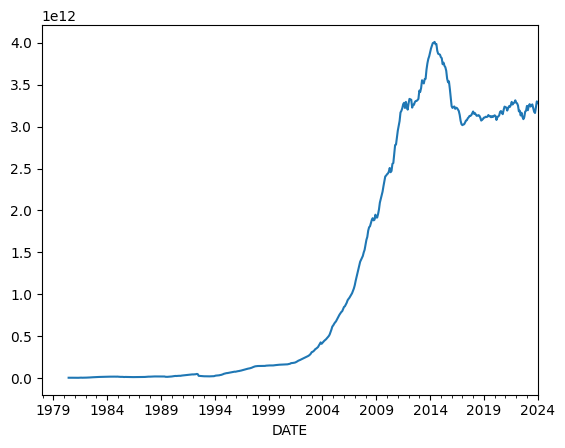

In [61]:
gold_reserves.TRESEGCNM052N.plot.line()

<Axes: xlabel='DATE'>

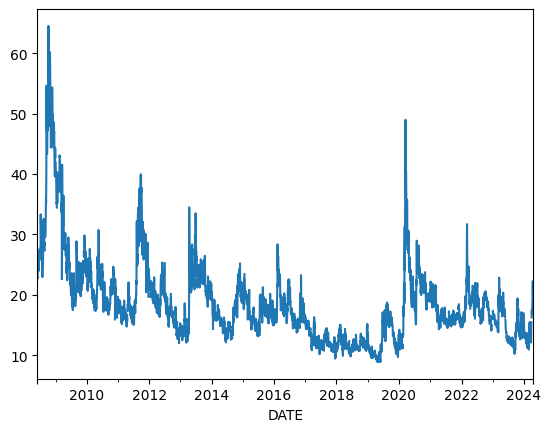

In [62]:
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)
gold_volatility.GVZCLS.plot.line()

<Axes: xlabel='DATE'>

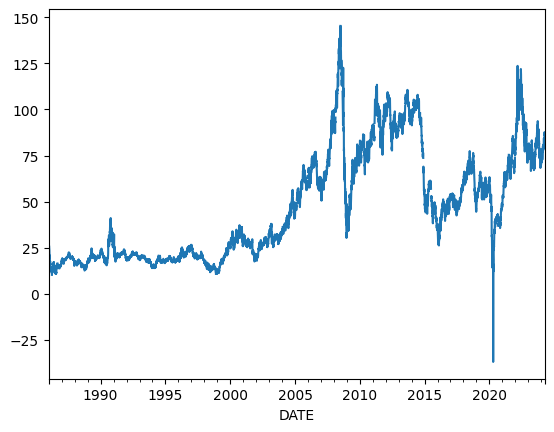

In [63]:
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)
oil_wti.DCOILWTICO.plot.line()

<Axes: xlabel='DATE'>

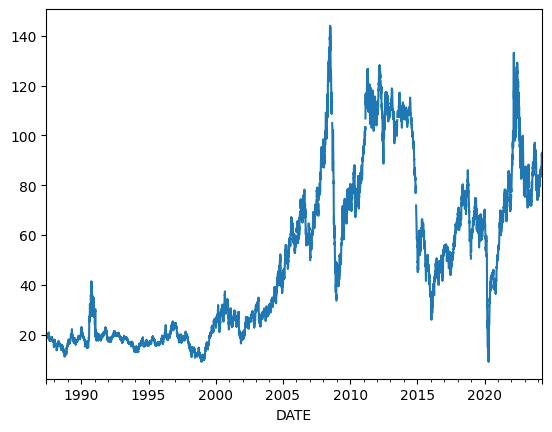

In [64]:
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)
oil_brent.DCOILBRENTEU.plot.line()

In [65]:
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [66]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0    Last  Previous  Highest    Lowest  \
0                   Currency   106.0     106.0   165.00     70.70   
1               Stock Market  5077.0    5071.0  5268.00      4.40   
2            GDP Growth Rate     3.4       4.9    34.80    -28.00   
3     GDP Annual Growth Rate     3.1       2.9    13.40     -7.50   
4          Unemployment Rate     3.8       3.9    14.90      2.50   
5          Non Farm Payrolls   303.0     270.0  4615.00 -20477.00   
6             Inflation Rate     3.5       3.2    23.70    -15.80   
7         Inflation Rate MoM     0.4       0.4     2.00     -1.80   
8              Interest Rate     5.5       5.5    20.00      0.25   
9           Balance of Trade   -68.9     -67.6     1.95   -103.00   
10           Current Account  -195.0    -196.0     9.96   -284.00   
11    Current Account to GDP    -3.0      -3.8     0.20     -6.00   
12    Government Debt to GDP   129.0     127.0   129.00     31.80   
13         Government Budget    -5

## **FINCANCIAL** **REPORTING**

In [67]:
nvda =  yf.Ticker('NVDA')
nvda.financials

,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Tax Effect Of Unusual Items,0.0,-284130000.0,0.0,0.0
Tax Rate For Calcs,0.12,0.21,0.019,0.017
Normalized EBITDA,35583000000.0,7340000000.0,11351000000.0,5691000000.0
Total Unusual Items,0.0,-1353000000.0,0.0,0.0
Total Unusual Items Excluding Goodwill,0.0,-1353000000.0,0.0,0.0
Net Income From Continuing Operation Net Minority Interest,29760000000.0,4368000000.0,9752000000.0,4332000000.0
Reconciled Depreciation,1508000000.0,1544000000.0,1174000000.0,1098000000.0
Reconciled Cost Of Revenue,16621000000.0,11618000000.0,9439000000.0,6279000000.0
EBITDA,35583000000.0,5987000000.0,11351000000.0,5691000000.0
EBIT,34075000000.0,4443000000.0,10177000000.0,4593000000.0


In [68]:

# balance sheet
nvda.balance_sheet

,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,1380000000.0
Ordinary Shares Number,2464000000.0,2466136572.0,2506000000.0,2480000000.0
Share Issued,2464000000.0,2466136572.0,2506000000.0,3860000000.0
Net Debt,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,11056000000.0,12031000000.0,11831000000.0,7597000000.0
...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,25984000000.0,13296000000.0,21208000000.0,11561000000.0
Other Short Term Investments,18704000000.0,9907000000.0,19218000000.0,10714000000.0


In [69]:
nvda.basic_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [70]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")


CSV file downloaded successfully.


In [71]:
global_stocks = pd.read_csv("/content/global_stocks.csv")
global_stocks

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Microsoft,MSFT,3028424589312,407.57,United States
1,2,Apple,AAPL,2577253007360,166.90,United States
2,3,NVIDIA,NVDA,2060574916608,824.23,United States
3,4,Alphabet (Google),GOOG,1977058983936,159.92,United States
4,5,Saudi Aramco,2222.SR,1942833479038,8.03,Saudi Arabia
...,...,...,...,...,...,...
8381,8382,Al Dhafra Insurance,DHAFRA.AE,0,0.00,United Arab Emirates
8382,8383,Abu Dhabi Aviation,ADAVIATION.AE,0,0.00,United Arab Emirates
8383,8384,X5 Retail Group,FIVE.ME,0,30.29,Netherlands
8384,8385,Ozon,OZON.ME,0,44.61,United States


# HOMEWORK

In [ ]:
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)
gdpc1

,GDPC1
DATE,
1954-07-01,2880.482
1954-10-01,2936.852
1955-01-01,3020.746
1955-04-01,3069.910
1955-07-01,3111.379
...,...
2022-10-01,21989.981
2023-01-01,22112.329
2023-04-01,22225.350


In [ ]:
gdpc1['yoy_growth'] = (gdpc1.GDPC1/gdpc1.GDPC1.shift(4))-1
gdpc1

,GDPC1,yoy_growth
DATE,,
1954-07-01,2880.482,NaN
1954-10-01,2936.852,NaN
1955-01-01,3020.746,NaN
1955-04-01,3069.910,NaN
1955-07-01,3111.379,0.080159
...,...,...
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825


In [ ]:
gdpc1.index = pd.to_datetime(gdpc1.index)
np.mean(gdpc1[gdpc1.index>=pd.to_datetime("01-01-2023")]['yoy_growth'])

0.02540443392867625

In [ ]:
new_start = date(year=2000, month=1, day=1)
dgs2 = pdr.DataReader("DGS2", "fred", start=new_start)
dgs10 = pdr.DataReader("DGS10", "fred", start=new_start)

In [ ]:
dgs2.index = pd.to_datetime(dgs2.index)
dgs10.index = pd.to_datetime(dgs10.index)

In [ ]:
res = pd.merge(dgs2, dgs10, how="inner", left_index=True, right_index=True)
res["diff"] = res['DGS10'] - res['DGS2']
res

,DGS2,DGS10,diff
DATE,,,
2000-01-03,6.38,6.58,0.20
2000-01-04,6.30,6.49,0.19
2000-01-05,6.38,6.62,0.24
2000-01-06,6.35,6.57,0.22
2000-01-07,6.31,6.52,0.21
...,...,...,...
2024-04-15,4.93,4.63,-0.30
2024-04-16,4.97,4.67,-0.30
2024-04-17,4.93,4.59,-0.34


In [ ]:
np.min(res['diff'])

-1.0800000000000005

In [ ]:
start = date(year=2019, month=4, day=9)
end = date(year=2024, month=4, day=9)
spx_index = pdr.get_data_stooq('^SPX', start, end)
ipc_mexico_index = pdr.get_data_stooq('^MXX', start, end)

In [ ]:
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-09,5217.03,5224.81,5160.78,5209.91,2.035069e+09
2024-04-08,5211.37,5219.57,5197.35,5202.39,2.000910e+09
2024-04-05,5158.95,5222.18,5157.21,5204.34,2.189563e+09
2024-04-04,5244.05,5256.59,5146.06,5147.21,2.526871e+09
2024-04-03,5194.37,5228.75,5194.37,5211.49,2.287219e+09


In [ ]:
(spx_index['Close'][0]/spx_index['Close'][-1])

1.8101278576888333

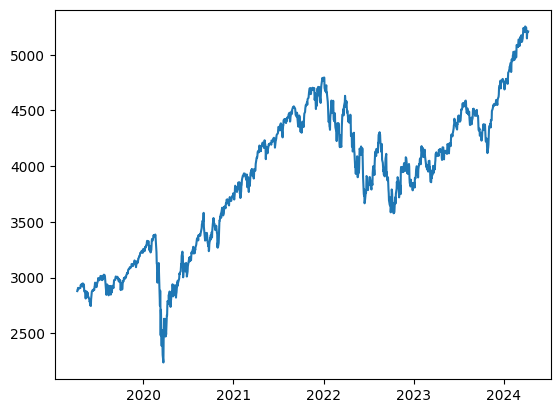

In [ ]:
plt.plot(spx_index['Close'])

In [ ]:
spx_index.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-04-15,2908.32,2909.60,2896.48,2905.58,1.715739e+09
2019-04-12,2900.86,2910.54,2898.37,2907.41,2.049161e+09
2019-04-11,2891.92,2893.42,2881.99,2888.32,1.632522e+09
2019-04-10,2881.37,2889.71,2879.13,2888.21,1.701322e+09
2019-04-09,2886.58,2886.88,2873.33,2878.20,1.671100e+09


In [ ]:
### 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM

In [ ]:
start = date(year=2023, month=1, day=1)
end = date(year=2023, month=12, day=31)
aapl = pdr.get_data_stooq('AAPL', start, end)
msft = pdr.get_data_stooq('MSFT', start, end)
goog = pdr.get_data_stooq('GOOG', start, end)
jpm = pdr.get_data_stooq('JPM', start, end)
brkb = pdr.get_data_stooq('BRK-B', start, end)
sr2222 = pdr.get_data_stooq('2222.SR', start, end)

In [ ]:
(np.max(msft.Close)-np.min(msft.Close))/np.max(msft.Close)

0.4191011235955056

In [ ]:
(np.max(aapl.Close)-np.min(aapl.Close))/np.max(aapl.Close)

0.3689364494472768

In [ ]:
(np.max(jpm.Close)-np.min(jpm.Close))/np.max(jpm.Close)

0.26652965355255437

In [ ]:
(np.max(goog.Close)-np.min(goog.Close))/np.max(goog.Close)

0.3924520375297577

In [ ]:
(np.max(brkb.Close)-np.min(brkb.Close))/np.max(brkb.Close)

0.20775750377888152

In [ ]:
## Answers: 3, 1, 1, 4, 3

In [ ]:
results = dict()
start = date(year=2023, month=1, day=1)
end = date(year=2023, month=12, day=31)

import yfinance as yf
for company in ["MSFT", "AAPL", "GOOG", "JPM", "BRK-B"]: # "2222.SR"
  div_data = yf.Ticker(company)
  div_data.dividends.index = pd.to_datetime(div_data.dividends.index)
  data_div_2023 = div_data.dividends[(div_data.dividends.index.tz_convert(None)>=pd.to_datetime("2023-1-1")) & (div_data.dividends.index.tz_convert(None)<=pd.to_datetime("2023-12-31"))]
  price_data = pdr.get_data_stooq(company, start, end)
  results[company] = np.sum(data_div_2023.values)/price_data["Close"][0]*100

print(results)

{'MSFT': 0.7419423465588767, 'AAPL': 0.49342959538773173, 'GOOG': 0.0, 'JPM': 2.380952380952381, 'BRK-B': 0.0}


In [ ]:
price_data = yf.download(tickers = ["^NSEI","^N225"])
price_data

[*********************100%%**********************]  2 of 2 completed


Price          Adj Close                       Close                \
Ticker             ^N225         ^NSEI         ^N225         ^NSEI   
Date                                                                 
1965-01-05   1257.719971           NaN   1257.719971           NaN   
1965-01-06   1263.989990           NaN   1263.989990           NaN   
1965-01-07   1274.270020           NaN   1274.270020           NaN   
1965-01-08   1286.430054           NaN   1286.430054           NaN   
1965-01-12   1288.540039           NaN   1288.540039           NaN   
...                  ...           ...           ...           ...   
2024-04-17  37961.800781           NaN  37961.800781           NaN   
2024-04-18  38079.699219  21995.849609  38079.699219  21995.849609   
2024-04-19  37068.351562  22147.000000  37068.351562  22147.000000   
2024-04-22  37438.609375  22336.400391  37438.609375  22336.400391   
2024-04-23  37552.160156  22368.000000  37552.160156  22368.000000   

Price               High                         Low                \
Ticker             ^N225         ^NSEI         ^N225         ^NSEI   
Date                                                                 
1965-01-05   1257.719971           NaN   1257.719971           NaN   
1965-01-06   1263.989990           NaN   1263.989990           NaN   
1965-01-07   1274.270020           NaN   1274.270020           NaN   
1965-01-08   1286.430054           NaN   1286.430054           NaN   
1965-01-12   1288.540039           NaN   1288.540039           NaN   
...                  ...           ...           ...           ...   
2024-04-17  38587.609375           NaN  37961.800781           NaN   
2024-04-18  38216.750000  22326.500000  37644.910156  21961.699219   
2024-04-19  37749.480469  22179.550781  36733.058594  21777.650391   
2024-04-22  37511.800781  22375.650391  37052.628906  22198.150391   
2024-04-23  37817.781250  22447.550781  37397.269531  22349.449219   

Price               Open                     Volume            
Ticker             ^N225         ^NSEI        ^N225     ^NSEI  
Date                                                           
1965-01-05   1257.719971           NaN          0.0       NaN  
1965-01-06   1263.989990           NaN          0.0       NaN  
1965-01-07   1274.270020           NaN          0.0       NaN  
1965-01-08   1286.430054           NaN          0.0       NaN  
1965-01-12   1288.540039           NaN          0.0       NaN  
...                  ...           ...          ...       ...  
2024-04-17  38587.468750           NaN  120600000.0       NaN  
2024-04-18  37745.039062  22212.349609  105800000.0  456900.0  
2024-04-19  37724.468750  21861.500000  155400000.0  362500.0  
2024-04-22  37240.929688  22336.900391  119400000.0  279300.0  
2024-04-23  37797.058594  22447.050781          0.0       0.0  

[14840 rows x 12 columns]